## Task 3 - Sales Prediction Using Python

Sales prediction means predicting how much of a product people will buy based on factors such as the amount you spend to advertise your product, the segment of people you advertise for, or the platform you are advertising on about your product. Typically, a product and service-based business always need their Data Scientist to predict their future sales with every step they take to manipulate the cost of advertising their product.

# Load necessary liabraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [4]:
# Reading csv file
df = pd.read_csv("/content/Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [5]:
df.shape

(200, 5)

## Analyzing The Dataset

In [6]:
# Getting info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
# Descriptive statistical analysis of data
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
# Checking for null values
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

## Visualizing The Dataset

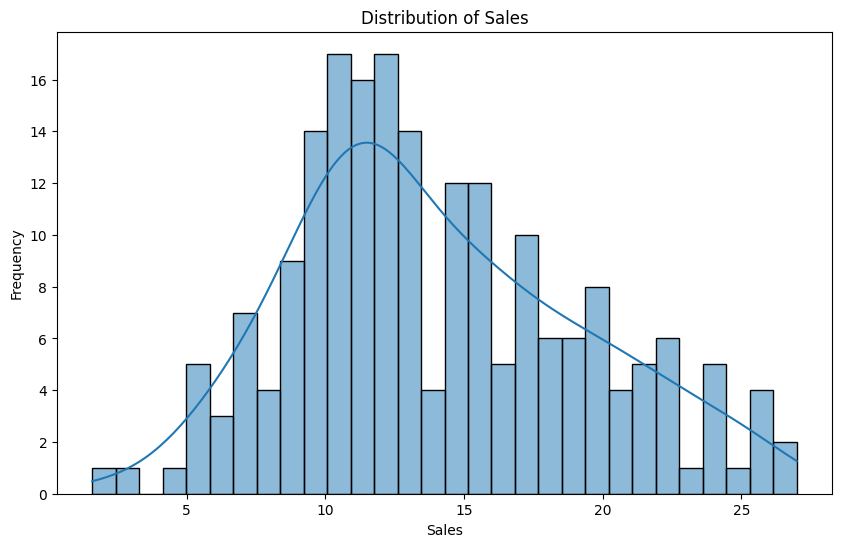

In [12]:
#Distribution of Sales
plt.figure(figsize=(10,6))
sns.histplot(df['Sales'],bins=30,kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


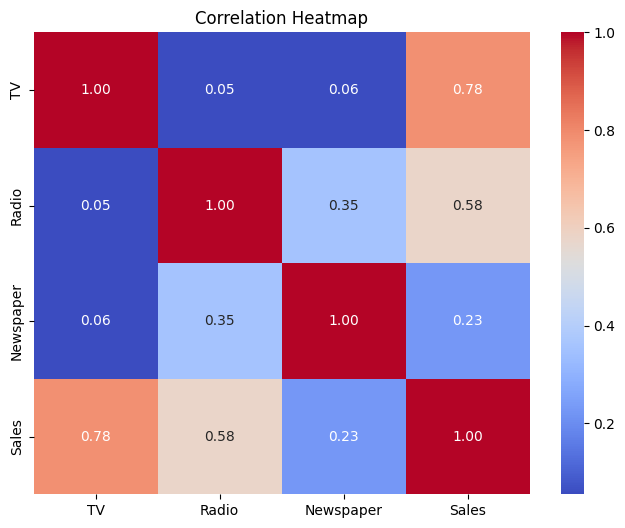

In [23]:
#Correlation heatmap

plt.figure(figsize=(8, 6))
correlation_matrix = df[['TV', 'Radio', 'Newspaper', 'Sales']].corr()
sns.heatmap(correlation_matrix, annot= True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [14]:
# Plotting for TV vs Sales
px.scatter(df, x='TV', y='Sales', width=850, height=500, title='TV vs Sales')

In [15]:
# Plotting for Radio vs Sales
px.scatter(df, x='Radio', y='Sales', width=850, height=500, title='Radio vs Sales')

In [16]:
# Plotting for Newspaper vs Sales
px.scatter(df, x='Newspaper', y='Sales', width=850, height=500, title='Newspaper vs Sales')

In [17]:
x = df.drop('Sales', axis=1)
y = df['Sales']

#Splitting The Data Into Test And Train Data

In [24]:
# Importing train test split library
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

# Training The Model

In [25]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

## Prediction

In [26]:
y_pred = model.predict(x_test)
y_pred

array([16.41227699, 20.84319293, 21.51186915, 10.65309994, 22.12405753,
       13.12383506, 21.03748883,  7.50385439, 13.64787029, 15.12040886,
        9.02055551,  6.70666642, 14.40155146,  8.88609041,  9.74353333,
       12.21551975,  8.71370868, 16.2941451 , 10.26802337, 18.80498245,
       19.58864662, 13.22318303, 12.3647867 , 21.31473607,  7.79734749,
        5.78189965, 20.74934811, 11.95476656,  9.199109  ,  8.52178704,
       12.40431294,  9.94865202, 21.36880272, 12.25374832, 18.29943527,
       20.13347356, 14.07464638, 20.88594679, 11.05214979,  4.55168744])

# Actual and Prediction

In [32]:
act_pred = pd.DataFrame({'Actual':y_test.values.flatten(), 'Predict':y_pred.flatten()})
act_pred

,Actual,Predict
0,16.9,16.412277
1,22.4,20.843193
2,21.4,21.511869
3,7.3,10.653100
4,24.7,22.124058
5,12.6,13.123835
6,22.3,21.037489
7,8.4,7.503854
8,11.5,13.647870
9,14.9,15.120409


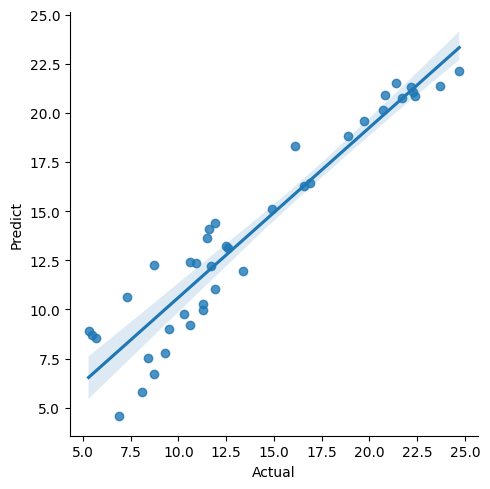

In [33]:
# Actual and Predicted Visualization
sns.lmplot(data = act_pred, x= 'Actual', y = "Predict")

Conclusion


In this task, did an analysis and visualization of the dataset.
And then trained the model using Linear Regression Algorithm and predicted the values.
Made a dataframe of actual and predicted values.
Finally, made a visualization of actual and predicted values.
